In [75]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def binomial_option_pricing(S, K, T, r, sigma, N, option_type="call", strike_type="europeia"):
    dt = T / N  # Tamanho do passo no tempo
    u = np.exp(min(sigma * np.sqrt(dt), 700))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    stock_tree = []
    option_tree = []
    
    stock_price = np.zeros(N + 1)
    option_price = np.zeros(N + 1)
    
    for i in range(N + 1):
        stock_price[i] = S * (u ** (N - i)) * (d ** i)
        if option_type == "call":
            option_price[i] = max(stock_price[i] - K, 0)
        else:
            option_price[i] = max(K - stock_price[i], 0)
        
    stock_tree.append(stock_price.copy())
    option_tree.append(option_price.copy())
    
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            vp_opt = np.exp(-r * dt) * (p * option_price[i] + (1 - p) * option_price[i + 1])
            vp_stock = np.exp(-r * dt) * (p * stock_price[i] + (1 - p) * stock_price[i + 1])
            stock_price[i] = vp_stock
            option_price[i] = max(vp_opt, K - stock_price[i]) if strike_type == 'americana' else vp_opt
        stock_tree.append(stock_price[:j+1].copy())
        option_tree.append(option_price[:j+1].copy())
    
    plot_binomial_trees(stock_tree, option_tree,strike_type)
    return option_price[0]

def plot_binomial_trees(stock_tree, option_tree,strike_type):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    def plot_tree(tree, ax, title):
        G = nx.DiGraph()
        pos = {}
        
        for level in range(len(tree)):
            for i in range(len(tree[level])):
                node = (level, i)
                G.add_node(node, value=round(tree[level][i], 2))
                pos[node] = (level, -i)
                
                if level > 0:
                    G.add_edge((level - 1, i), node)
                    G.add_edge((level - 1, i + 1), node)
        
        labels = {node: f'{data["value"]}' for node, data in G.nodes(data=True)}
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=10, edge_color='gray', ax=ax)
        ax.set_title(title)
    
    plot_tree(stock_tree, axes[0], "Árvore Binomial de Preços")
    plot_tree(option_tree, axes[1], f"Árvore Binomial do Prêmio da Opção - {strike_type}")
    plt.show()


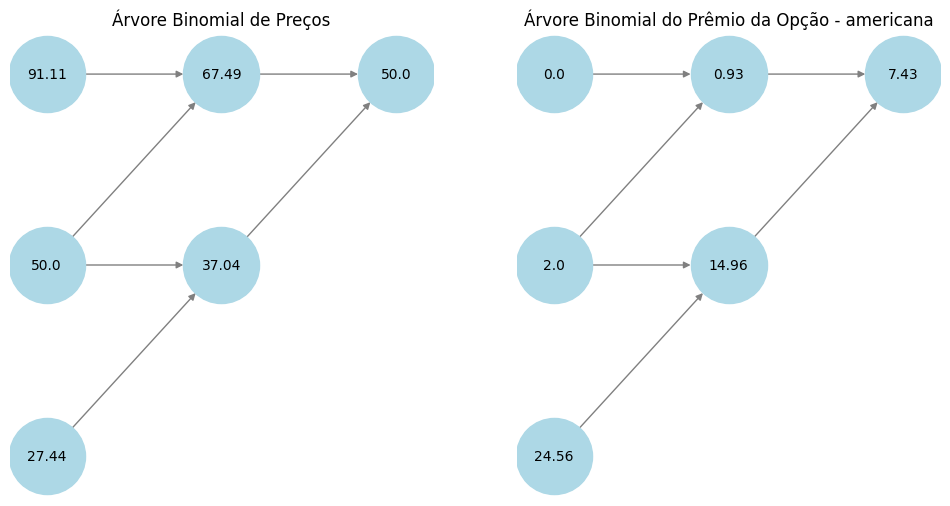

Preço do prêmio venda (Put): 7.43


In [78]:
S = 50  # Preço inicial do ativo
K = 52  # Preço de exercício
T = 2    # Tempo até expiração 
r = 0.05 # Taxa de juros livre de risco 
sigma = 0.3  # Volatilidade 
N = 2  # Número de passos na árvore
put_price = binomial_option_pricing(S, K, T, r, sigma, N, "put", "americana")
print(f"Preço do prêmio venda (Put): {put_price:.2f}")
